In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('C:/Users/anjal/Documents/DataFiles/GTZAN/Data/features_3_sec.csv')

In [3]:
df.shape

(9990, 60)

In [4]:
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [5]:
df.describe()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,9990.0,9990.000000,9990.000000,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,...,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000
mean,66149.0,0.379534,0.084876,0.130859,2.676388e-03,2199.219431,4.166727e+05,2241.385959,1.182711e+05,4566.076592,...,1.448240,49.988755,-4.198706,51.962753,0.739943,52.488851,-2.497306,54.973829,-0.917584,57.322614
std,0.0,0.090466,0.009637,0.068545,3.585628e-03,751.860611,4.349644e+05,543.854449,1.013505e+05,1642.065335,...,5.735149,34.442816,5.677379,36.400669,5.181313,38.177120,5.111799,41.585677,5.253243,46.444212
min,66149.0,0.107108,0.015345,0.000953,4.379535e-08,472.741636,8.118813e+02,499.162910,1.183520e+03,658.336276,...,-26.850016,1.325786,-27.809795,1.624544,-20.733809,3.437439,-27.448456,3.065302,-35.640659,0.282131
25%,66149.0,0.315698,0.079833,0.083782,6.145900e-04,1630.680158,1.231961e+05,1887.455790,4.876553e+04,3378.311110,...,-2.227478,29.584894,-7.951722,29.863448,-2.516638,29.636197,-5.734123,30.496412,-4.004475,30.011365
50%,66149.0,0.384741,0.085108,0.121253,1.491318e-03,2208.628236,2.650692e+05,2230.575595,8.996072e+04,4631.377892,...,1.461623,41.702393,-4.443021,42.393583,0.733772,41.831377,-2.702366,43.435253,-1.030939,44.332155
75%,66149.0,0.442443,0.091092,0.176328,3.130862e-03,2712.581884,5.624152e+05,2588.340505,1.585674e+05,5591.634521,...,5.149752,59.274619,-0.726945,61.676964,3.888734,62.033906,0.514246,65.328602,2.216603,68.210421
max,66149.0,0.749481,0.120964,0.442567,3.261522e-02,5432.534406,4.794119e+06,3708.147554,1.235143e+06,9487.446477,...,39.144405,683.932556,34.048843,529.363342,36.970322,629.729797,31.365425,1143.230591,34.212101,910.473206


In [6]:
missing_values_count = df.isnull().sum()
print(missing_values_count)

filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var     

In [7]:
df = df.drop('filename', axis=1)

In [8]:
df = df.drop('length', axis=1)

In [9]:
df['label'].unique()

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [10]:
label_encoding = {'blues': 1, 'classical': 2, 'country': 3, 'disco': 4, 'hiphop': 5, 'jazz': 6, 'metal': 7, 'pop': 8, 'reggae': 9, 'rock': 10}
df['label'] = df['label'].replace(label_encoding)

In [11]:
df['label'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

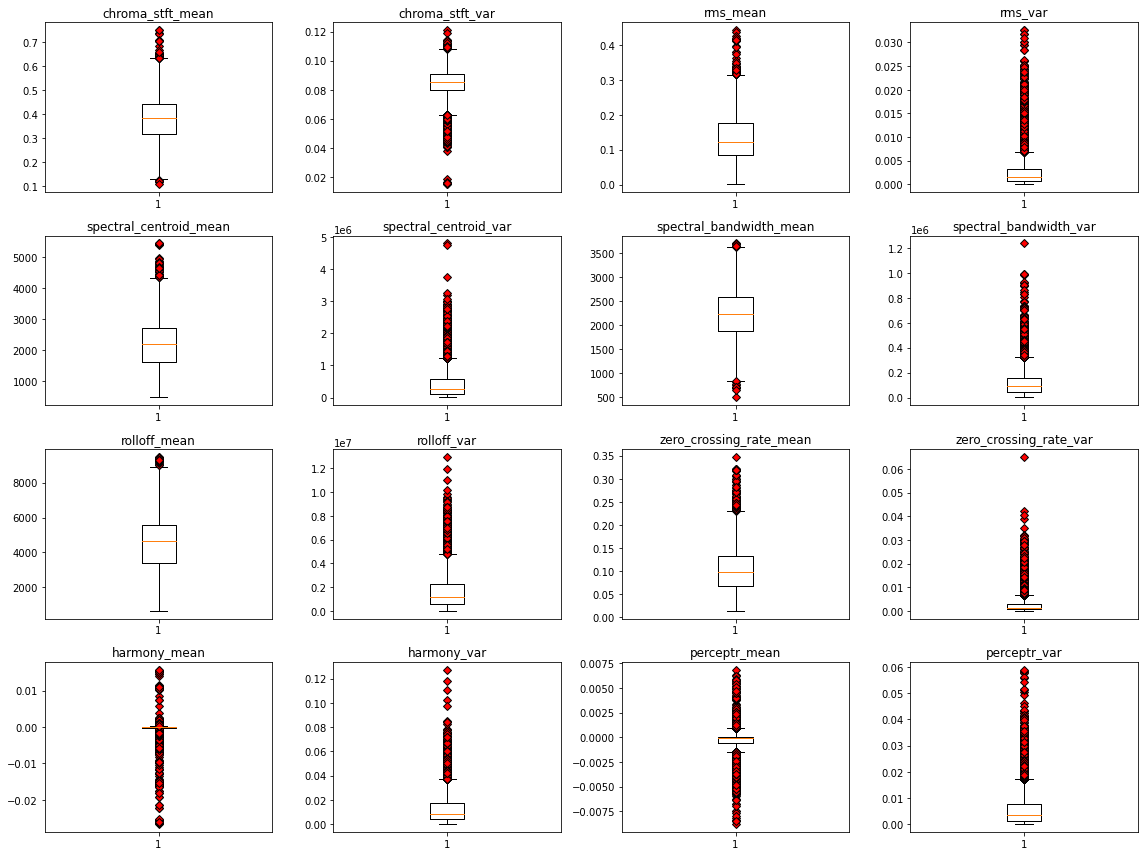

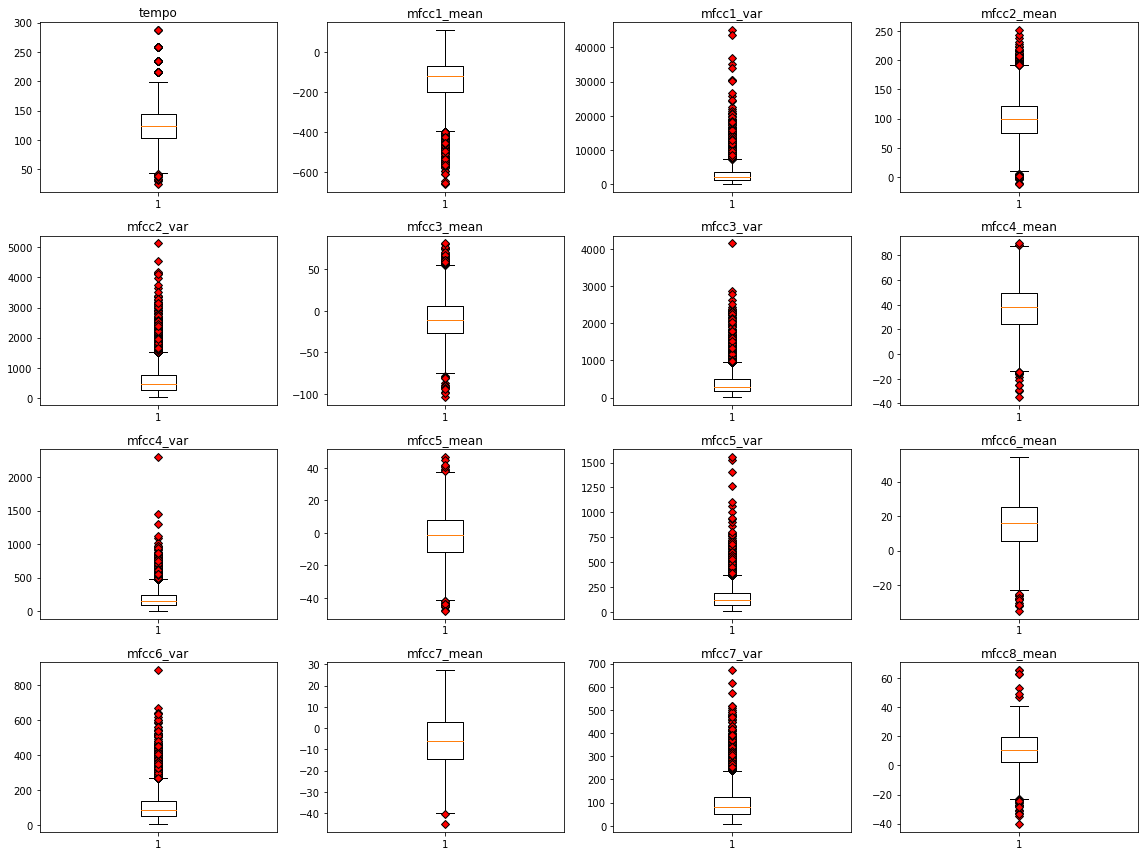

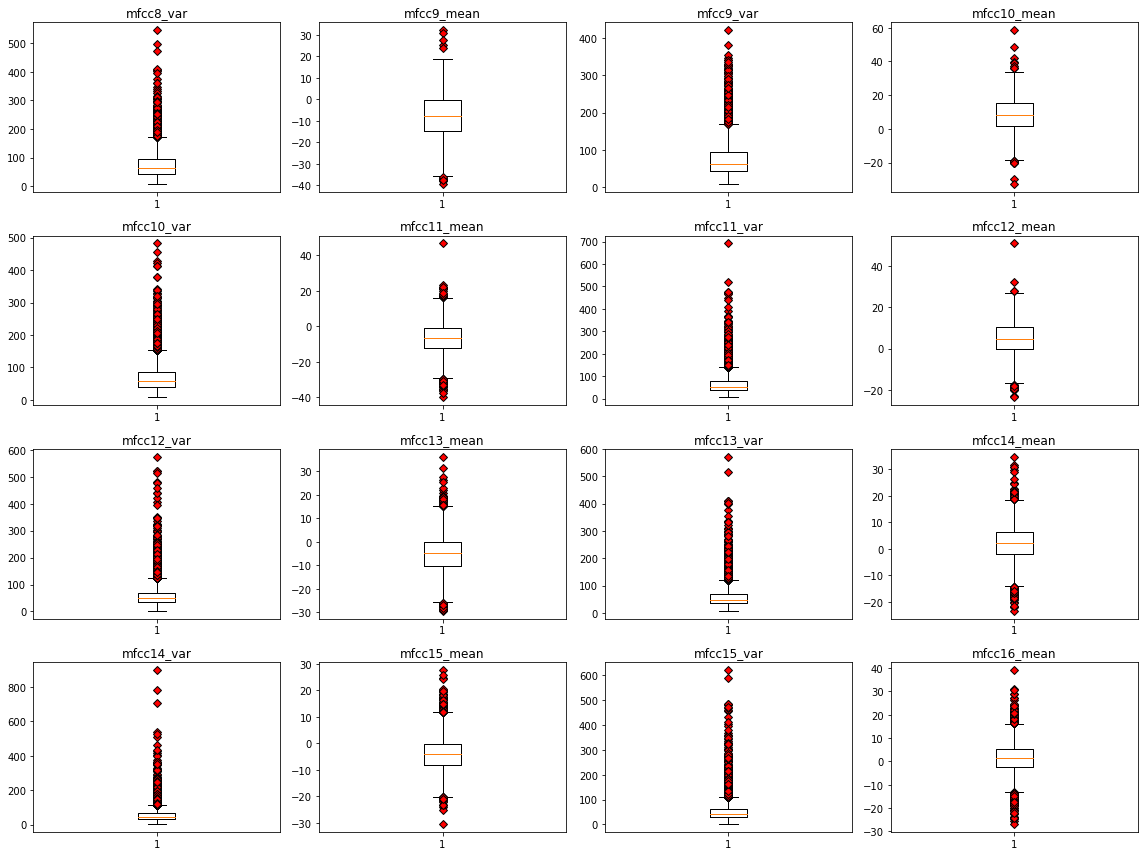

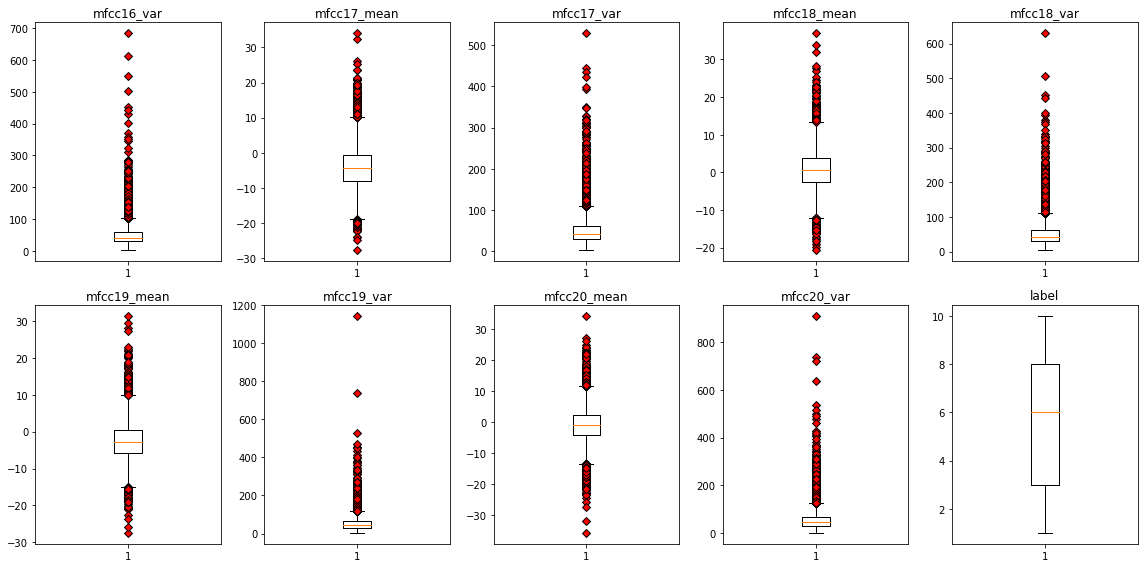

In [12]:
for i in range(0, 48, 16):
    fig, axs = plt.subplots(4, 4, figsize=(16, 12))
    for j, ax in enumerate(axs.flatten()):
        if i+j < 48:
            boxplot = ax.boxplot(df.iloc[:, i+j], flierprops=dict(markerfacecolor='r', marker='D'))
            ax.set_title(df.columns[i+j])
    plt.tight_layout()

fig, axs = plt.subplots(2, 5, figsize=(16, 8))
for i, ax in enumerate(axs.flatten()):
    if i < 10:
        boxplot = ax.boxplot(df.iloc[:, i+48], flierprops=dict(markerfacecolor='r', marker='D'))
        ax.set_title(df.columns[i+48])
plt.tight_layout()

In [13]:
import numpy as np
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR


num_outliers = (df < lower_bound) | (df > upper_bound)
outlier_count = num_outliers.sum()
outlier_percent = (outlier_count / len(df)) * 100
outlier_percent_sorted = outlier_percent.sort_values(ascending=False)

print(outlier_percent_sorted)

harmony_mean               21.771772
perceptr_mean              14.624625
zero_crossing_rate_var      9.069069
rms_var                     9.049049
mfcc20_var                  6.766767
mfcc19_var                  6.556557
mfcc18_var                  6.366366
perceptr_var                6.326326
spectral_centroid_var       5.935936
mfcc17_var                  5.825826
mfcc16_var                  5.585586
harmony_var                 5.335335
mfcc15_var                  5.245245
mfcc14_var                  4.754755
mfcc13_var                  4.704705
rolloff_var                 4.454454
mfcc12_var                  4.454454
spectral_bandwidth_var      4.434434
mfcc1_var                   4.424424
mfcc2_var                   4.414414
mfcc3_var                   4.294294
mfcc10_var                  4.084084
mfcc7_var                   4.074074
mfcc5_var                   4.024024
mfcc6_var                   3.993994
mfcc4_var                   3.893894
mfcc11_var                  3.843844
m

In [14]:
df = df.drop(['harmony_mean','perceptr_mean'], axis=1)

In [15]:
len(df.columns)

56

In [16]:
df.describe()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
count,9990.000000,9990.000000,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,9.990000e+03,...,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000
mean,0.379534,0.084876,0.130859,2.676388e-03,2199.219431,4.166727e+05,2241.385959,1.182711e+05,4566.076592,1.628790e+06,...,49.988755,-4.198706,51.962753,0.739943,52.488851,-2.497306,54.973829,-0.917584,57.322614,5.500801
std,0.090466,0.009637,0.068545,3.585628e-03,751.860611,4.349644e+05,543.854449,1.013505e+05,1642.065335,1.489398e+06,...,34.442816,5.677379,36.400669,5.181313,38.177120,5.111799,41.585677,5.253243,46.444212,2.872355
min,0.107108,0.015345,0.000953,4.379535e-08,472.741636,8.118813e+02,499.162910,1.183520e+03,658.336276,1.145102e+03,...,1.325786,-27.809795,1.624544,-20.733809,3.437439,-27.448456,3.065302,-35.640659,0.282131,1.000000
25%,0.315698,0.079833,0.083782,6.145900e-04,1630.680158,1.231961e+05,1887.455790,4.876553e+04,3378.311110,5.595514e+05,...,29.584894,-7.951722,29.863448,-2.516638,29.636197,-5.734123,30.496412,-4.004475,30.011365,3.000000
50%,0.384741,0.085108,0.121253,1.491318e-03,2208.628236,2.650692e+05,2230.575595,8.996072e+04,4631.377892,1.160080e+06,...,41.702393,-4.443021,42.393583,0.733772,41.831377,-2.702366,43.435253,-1.030939,44.332155,6.000000
75%,0.442443,0.091092,0.176328,3.130862e-03,2712.581884,5.624152e+05,2588.340505,1.585674e+05,5591.634521,2.262437e+06,...,59.274619,-0.726945,61.676964,3.888734,62.033906,0.514246,65.328602,2.216603,68.210421,8.000000
max,0.749481,0.120964,0.442567,3.261522e-02,5432.534406,4.794119e+06,3708.147554,1.235143e+06,9487.446477,1.298320e+07,...,683.932556,34.048843,529.363342,36.970322,629.729797,31.365425,1143.230591,34.212101,910.473206,10.000000


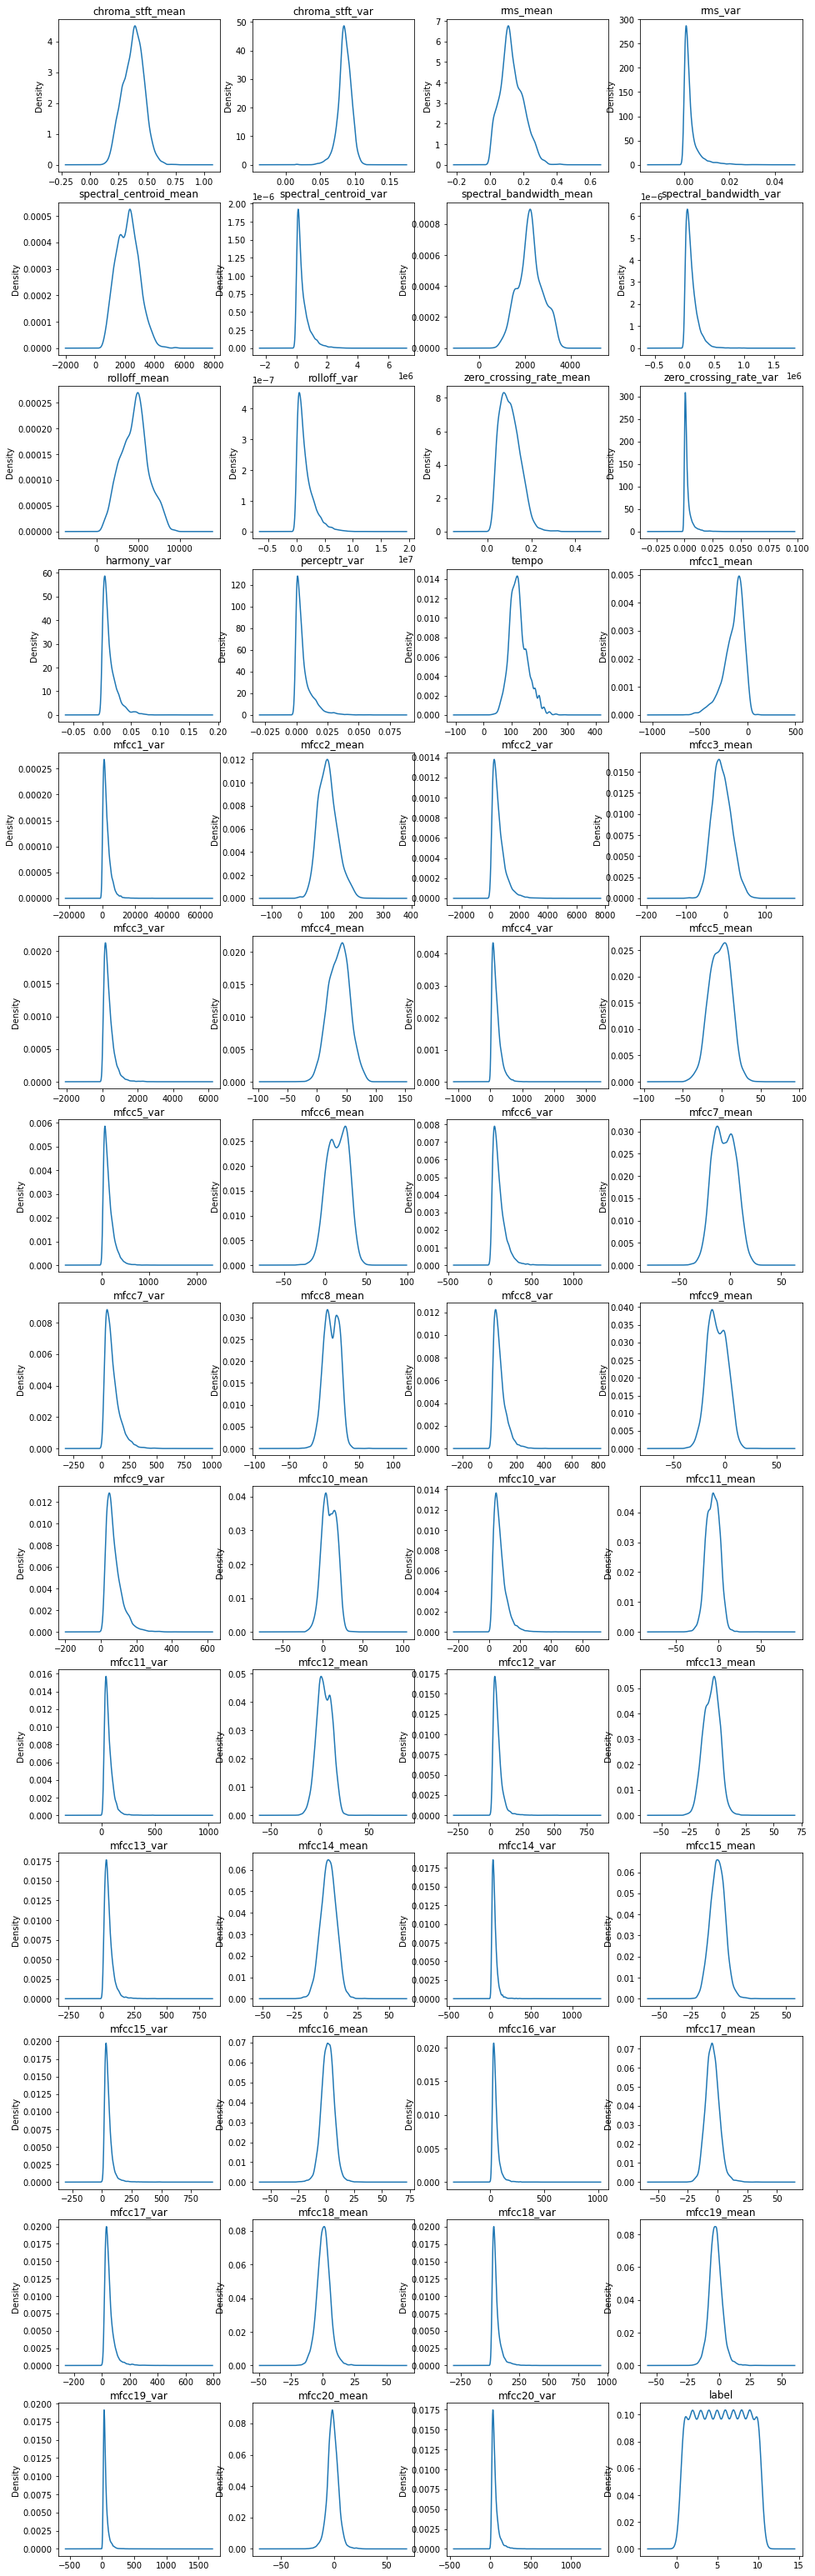

In [17]:
cols = df.columns
num_cols = len(cols)
num_rows = int(math.ceil(num_cols / 4))  

fig, axs = plt.subplots(num_rows, 4, figsize=(16, num_rows*4))
for i, col in enumerate(cols):
    row_idx = i // 4
    col_idx = i % 4
    axs[row_idx, col_idx].set_title(col)
    df[col].plot(kind='density', ax=axs[row_idx, col_idx])

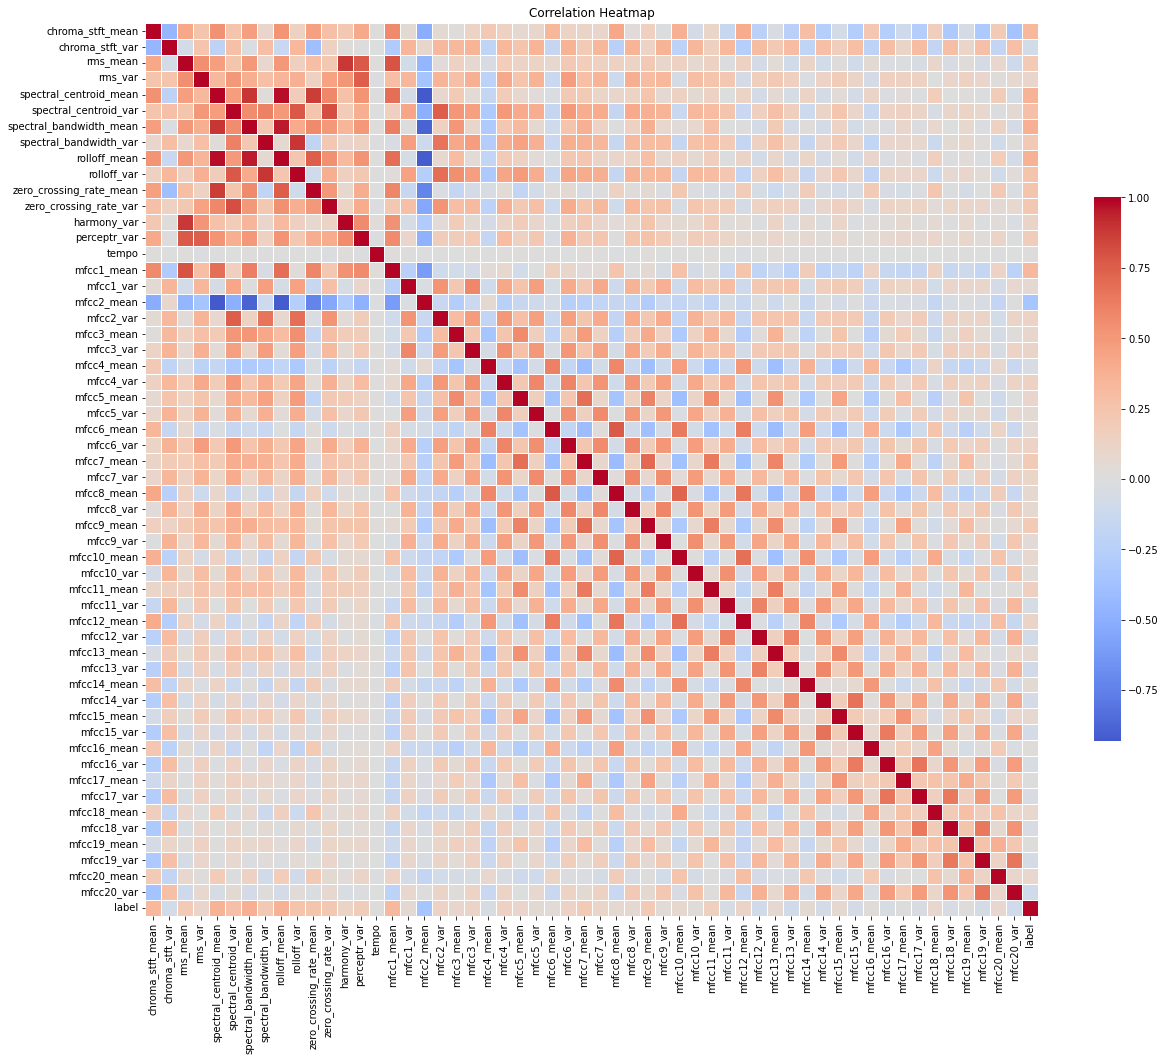

In [18]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title("Correlation Heatmap")
plt.show()

In [19]:
df.corr()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
chroma_stft_mean,1.000000,-0.443757,0.424706,0.243647,0.534670,0.251985,0.464617,0.100909,0.526881,0.138394,...,-0.264815,-0.103968,-0.273841,0.168254,-0.308342,-0.062985,-0.313233,0.193666,-0.363354,0.330370
chroma_stft_var,-0.443757,1.000000,-0.078410,0.251900,-0.208136,0.276964,-0.031197,0.291007,-0.141792,0.330930,...,0.296099,0.111544,0.303262,-0.171744,0.295359,0.107008,0.277295,-0.173398,0.287195,-0.079683
rms_mean,0.424706,-0.078410,1.000000,0.553770,0.470781,0.241796,0.495142,0.085760,0.500178,0.157281,...,-0.032953,-0.013952,-0.041470,0.087615,-0.046180,0.024552,-0.062662,0.082251,-0.103519,0.205471
rms_var,0.243647,0.251900,0.553770,1.000000,0.327809,0.509235,0.383329,0.285950,0.350716,0.377474,...,0.159390,0.144238,0.144163,-0.004785,0.102019,0.136798,0.095054,0.015085,0.073571,0.101467
spectral_centroid_mean,0.534670,-0.208136,0.470781,0.327809,1.000000,0.476959,0.890382,0.021120,0.974360,0.172380,...,-0.025006,0.026879,-0.018358,0.177934,-0.006376,0.018651,-0.011018,0.191512,-0.051205,0.360175
spectral_centroid_var,0.251985,0.276964,0.241796,0.509235,0.476959,1.000000,0.556491,0.614254,0.492965,0.780308,...,0.125906,0.134869,0.115752,-0.045517,0.093684,0.123857,0.074366,-0.012324,0.052981,0.281352
spectral_bandwidth_mean,0.464617,-0.031197,0.495142,0.383329,0.890382,0.556491,1.000000,0.223836,0.951000,0.406680,...,-0.023060,0.089523,-0.021857,0.084331,-0.005564,0.074453,-0.020422,0.133895,-0.063954,0.376621
spectral_bandwidth_var,0.100909,0.291007,0.085760,0.285950,0.021120,0.614254,0.223836,1.000000,0.070097,0.891339,...,0.101519,0.093049,0.078486,-0.122140,0.051146,0.094140,0.022953,-0.091730,0.015888,0.210972
rolloff_mean,0.526881,-0.141792,0.500178,0.350716,0.974360,0.492965,0.951000,0.070097,1.000000,0.237905,...,-0.032600,0.035871,-0.026397,0.158802,-0.012166,0.033071,-0.020990,0.182626,-0.065557,0.369515
rolloff_var,0.138394,0.330930,0.157281,0.377474,0.172380,0.780308,0.406680,0.891339,0.237905,1.000000,...,0.112760,0.099636,0.095440,-0.110838,0.069654,0.094853,0.044384,-0.090789,0.031120,0.260298


In [20]:
corr_matrix = df.corr()
pairwise_correlations = corr_matrix.unstack()
pairwise_correlations = pairwise_correlations.drop_duplicates().dropna()
sorted_correlations = pairwise_correlations.sort_values(ascending=False)

In [21]:
print(sorted_correlations.head(15))

chroma_stft_mean         chroma_stft_mean           1.000000
spectral_centroid_mean   rolloff_mean               0.974360
spectral_bandwidth_mean  rolloff_mean               0.951000
spectral_bandwidth_var   rolloff_var                0.891339
spectral_centroid_mean   spectral_bandwidth_mean    0.890382
rms_mean                 harmony_var                0.884846
spectral_centroid_mean   zero_crossing_rate_mean    0.865487
spectral_centroid_var    zero_crossing_rate_var     0.818348
rms_mean                 mfcc1_mean                 0.795000
spectral_centroid_var    rolloff_var                0.780308
mfcc6_mean               mfcc8_mean                 0.769248
rms_mean                 perceptr_var               0.766446
rolloff_mean             zero_crossing_rate_mean    0.755442
spectral_centroid_var    mfcc2_var                  0.748612
rms_var                  perceptr_var               0.744850
dtype: float64


In [22]:
df = df.drop(['spectral_centroid_mean','spectral_bandwidth_mean','spectral_bandwidth_var'],axis=1)

In [23]:
X = df.drop('label', axis=1)
y = df['label']

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

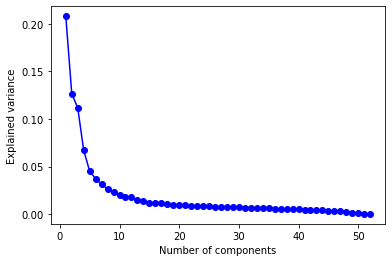

In [25]:
pca = PCA()
pca.fit(X_scaled)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, 'bo-')
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

In [26]:
pca = PCA(n_components=12)
X_pca = pca.fit_transform(X_scaled)

In [27]:
df_pca = pd.DataFrame(data=X_pca)
df_pca['label'] = y

In [28]:
df_pca.shape

(9990, 13)

In [29]:
df_pca.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 'label'], dtype='object')

In [30]:
df_pca['label'].value_counts()

1     1000
6     1000
7     1000
8     1000
9     1000
4      999
2      998
5      998
10     998
3      997
Name: label, dtype: int64

In [31]:
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,label
0,-1.731736,0.216238,0.749912,-0.921875,-0.016142,-1.004118,-0.024569,-0.281547,0.138578,0.187780,0.136367,0.174685,1
1,-2.484077,0.200474,1.767866,0.428246,-0.391701,-0.222257,-0.758078,-0.113312,0.548457,-0.088799,0.451051,-0.428794,1
2,-1.728930,-0.013076,0.548662,0.042710,-1.171010,-1.189234,-0.625472,0.062313,-0.281826,0.306589,-0.020125,0.077267,1
3,-2.341590,0.039708,0.919030,-0.604440,-0.200098,-0.869820,-0.380123,-0.557823,0.309720,0.464806,0.545901,0.216463,1
4,-2.863800,0.140608,0.684801,-0.154782,-0.566477,-1.177621,-0.322459,-0.421278,-0.163608,0.640347,-0.113425,0.521318,1


In [32]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(df_pca.drop('label', axis=1), df_pca['label'], test_size=0.25, random_state=42)


print("X_train Shape:", X_train.shape)
print("X_test Shape:", X_test.shape)
print("y_train Shape:", y_train.shape)
print("y_test Shape:", y_test.shape)


X_train Shape: (7492, 12)
X_test Shape: (2498, 12)
y_train Shape: (7492,)
y_test Shape: (2498,)


In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.metrics import classification_report


knn = KNeighborsClassifier()
nb = GaussianNB()
rf = RandomForestClassifier()
lr = LogisticRegression()
lda = LinearDiscriminantAnalysis()
svm = SVC()


knn.fit(X_train, y_train)
nb.fit(X_train, y_train)
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)
lda.fit(X_train, y_train)
svm.fit(X_train, y_train)


knn_pred = knn.predict(X_test)
nb_pred = nb.predict(X_test)
rf_pred = rf.predict(X_test)
lr_pred = lr.predict(X_test)
lda_pred = lda.predict(X_test)
svm_pred = svm.predict(X_test)


print("KNN Classification Report:")
print(classification_report(y_test, knn_pred))

print("Naive Bayes Classification Report:")
print(classification_report(y_test, nb_pred))

print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))

print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_pred))

print("LDA Classification Report:")
print(classification_report(y_test, lda_pred))

print("SVM Classification Report:")
print(classification_report(y_test, svm_pred))

C:\Users\anjal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNN Classification Report:
              precision    recall  f1-score   support

           1       0.74      0.77      0.75       257
           2       0.86      0.92      0.89       256
           3       0.62      0.74      0.68       232
           4       0.63      0.72      0.67       255
           5       0.81      0.75      0.78       270
           6       0.79      0.74      0.76       244
           7       0.88      0.82      0.85       261
           8       0.80      0.82      0.81       224
           9       0.75      0.75      0.75       254
          10       0.72      0.53      0.61       245

    accuracy                           0.76      2498
   macro avg       0.76      0.76      0.76      2498
weighted avg       0.76      0.76      0.76      2498

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           1       0.53      0.25      0.34       257
           2       0.78      0.80      0.79       256
           3    

In [34]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

print("KNN Metrics:")
print("Accuracy:", accuracy_score(y_test, knn_pred))
print("Precision:", precision_score(y_test, knn_pred,average='macro'))
print("Recall:", recall_score(y_test, knn_pred,average='macro'))
print("F1 Score:", f1_score(y_test, knn_pred,average='macro'))
print('\n')
print("Naive Bayes Metrics:")
print("Accuracy:", accuracy_score(y_test, nb_pred))
print("Precision:", precision_score(y_test, nb_pred,average='macro'))
print("Recall:", recall_score(y_test, nb_pred,average='macro'))
print("F1 Score:", f1_score(y_test, nb_pred,average='macro'))
print('\n')
print("Random Forest Metrics:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Precision:", precision_score(y_test, rf_pred,average='macro'))
print("Recall:", recall_score(y_test, rf_pred,average='macro'))
print("F1 Score:", f1_score(y_test, rf_pred,average='macro'))
print('\n')
print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test, lr_pred))
print("Precision:", precision_score(y_test, lr_pred,average='macro'))
print("Recall:", recall_score(y_test, lr_pred,average='macro'))
print("F1 Score:", f1_score(y_test, lr_pred,average='macro'))
print('\n')
print("LDA Metrics:")
print("Accuracy:", accuracy_score(y_test, lda_pred))
print("Precision:", precision_score(y_test, lda_pred,average='macro'))
print("Recall:", recall_score(y_test, lda_pred,average='macro'))
print("F1 Score:", f1_score(y_test, lda_pred,average='macro'))
print('\n')
print("SVM Metrics:")
print("Accuracy:", accuracy_score(y_test, svm_pred))
print("Precision:", precision_score(y_test, svm_pred,average='macro'))
print("Recall:", recall_score(y_test, svm_pred,average='macro'))
print("F1 Score:", f1_score(y_test, svm_pred,average='macro'))

KNN Metrics:
Accuracy: 0.7566052842273819
Precision: 0.7591552790612084
Recall: 0.7561072420723634
F1 Score: 0.7550222155862784


Naive Bayes Metrics:
Accuracy: 0.5068054443554844
Precision: 0.5118378956995205
Recall: 0.5065222727321381
F1 Score: 0.4959297297818693


Random Forest Metrics:
Accuracy: 0.7373899119295436
Precision: 0.7342208041605509
Recall: 0.736517978984267
F1 Score: 0.7332081573205491


Logistic Regression Metrics:
Accuracy: 0.5536429143314652
Precision: 0.5375146597372649
Recall: 0.5535465618212347
F1 Score: 0.5400645858079806


LDA Metrics:
Accuracy: 0.5124099279423538
Precision: 0.49770742752733665
Recall: 0.5129413949669543
F1 Score: 0.494099763757428


SVM Metrics:
Accuracy: 0.6937550040032026
Precision: 0.6897122911535681
Recall: 0.6935901866195163
F1 Score: 0.6903376024342267


KNN Accuracy: 0.7566052842273819
Naive Bayes Accuracy: 0.5068054443554844
Random Forest Accuracy: 0.7373899119295436
Logistic Regression Accuracy: 0.5536429143314652
LDA Accuracy: 0.5124099279423538
SVM Accuracy: 0.6937550040032026


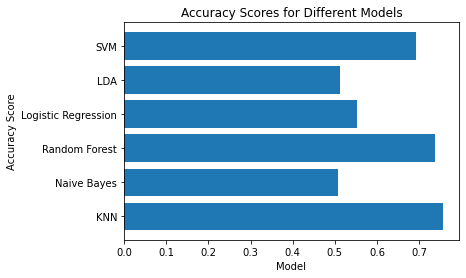

In [35]:
models = ['KNN', 'Naive Bayes', 'Random Forest', 'Logistic Regression', 'LDA', 'SVM']
accuracy_scores = [accuracy_score(y_test, knn_pred), accuracy_score(y_test, nb_pred), accuracy_score(y_test, rf_pred), accuracy_score(y_test, lr_pred), accuracy_score(y_test, lda_pred), accuracy_score(y_test, svm_pred)]

for model, accuracy in zip(models, accuracy_scores):
    print(model, "Accuracy:", accuracy)

# Plot the accuracy scores for each model
plt.barh(models, accuracy_scores)
plt.title('Accuracy Scores for Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.show()

KNN Precision: 0.7591552790612084
Naive Bayes Precision: 0.5118378956995205
Random Forest Precision: 0.7342208041605509
Logistic Regression Precision: 0.5375146597372649
LDA Precision: 0.49770742752733665
SVM Precision: 0.6897122911535681


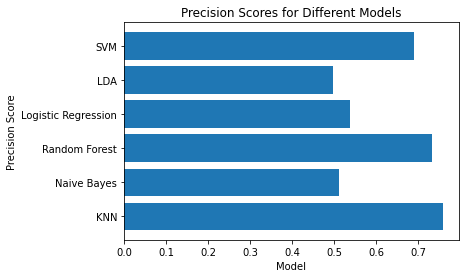

In [36]:
models = ['KNN', 'Naive Bayes', 'Random Forest', 'Logistic Regression', 'LDA', 'SVM']
precision_scores = [precision_score(y_test, knn_pred, average = 'macro'), precision_score(y_test, nb_pred,average = 'macro'), precision_score(y_test, rf_pred,average = 'macro'), precision_score(y_test, lr_pred,average = 'macro'), precision_score(y_test, lda_pred,average = 'macro'), precision_score(y_test, svm_pred,average = 'macro')]

for model, precision in zip(models, precision_scores):
    print(model, "Precision:", precision)


plt.barh(models, precision_scores)
plt.title('Precision Scores for Different Models')
plt.xlabel('Model')
plt.ylabel('Precision Score')
plt.show()

KNN F1 Score 0.7591552790612084
Naive Bayes F1 Score 0.5118378956995205
Random Forest F1 Score 0.7342208041605509
Logistic Regression F1 Score 0.5375146597372649
LDA F1 Score 0.49770742752733665
SVM F1 Score 0.6897122911535681


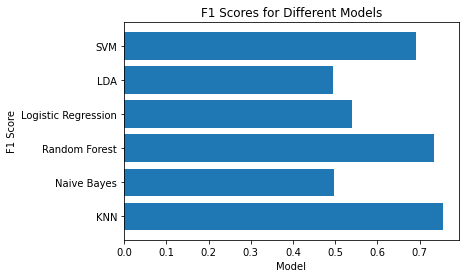

In [37]:
models = ['KNN', 'Naive Bayes', 'Random Forest', 'Logistic Regression', 'LDA', 'SVM']
f1_scores = [f1_score(y_test, knn_pred, average = 'macro'), f1_score(y_test, nb_pred,average = 'macro'), f1_score(y_test, rf_pred,average = 'macro'), f1_score(y_test, lr_pred,average = 'macro'), f1_score(y_test, lda_pred,average = 'macro'), f1_score(y_test, svm_pred,average = 'macro')]

for model, precision in zip(models, precision_scores):
    print(model, "F1 Score", precision)


plt.barh(models, f1_scores)
plt.title('F1 Scores for Different Models')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.show()

KNN Recall Score 0.7591552790612084
Naive Bayes Recall Score 0.5118378956995205
Random Forest Recall Score 0.7342208041605509
Logistic Regression Recall Score 0.5375146597372649
LDA Recall Score 0.49770742752733665
SVM Recall Score 0.6897122911535681


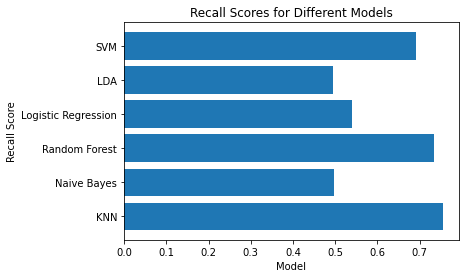

In [38]:
models = ['KNN', 'Naive Bayes', 'Random Forest', 'Logistic Regression', 'LDA', 'SVM']
recall = [recall_score(y_test, knn_pred, average = 'macro'), recall_score(y_test, nb_pred,average = 'macro'), recall_score(y_test, rf_pred,average = 'macro'), recall_score(y_test, lr_pred,average = 'macro'), recall_score(y_test, lda_pred,average = 'macro'), recall_score(y_test, svm_pred,average = 'macro')]

for model, precision in zip(models, precision_scores):
    print(model, "Recall Score", precision)


plt.barh(models, f1_scores)
plt.title('Recall Scores for Different Models')
plt.xlabel('Model')
plt.ylabel('Recall Score')
plt.show()

In [39]:
!pip install scikit-plot

In [40]:
from sklearn.metrics import roc_curve, auc

C:\Users\anjal\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\anjal\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


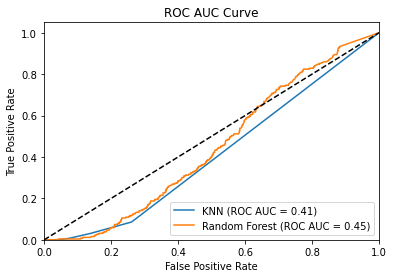

In [41]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

knn = KNeighborsClassifier()
rf = RandomForestClassifier()
ovr_knn = OneVsRestClassifier(knn)
ovr_rf = OneVsRestClassifier(rf)
ovr_knn.fit(X_train, y_train)
ovr_rf.fit(X_train, y_train)
y_prob_knn = ovr_knn.predict_proba(X_test)
y_prob_rf = ovr_rf.predict_proba(X_test)

y_test_bin = label_binarize(y_test, classes=[0, 1, 2])


fpr_knn = dict()
tpr_knn = dict()
roc_auc_knn = dict()
for i in range(3):
    fpr_knn[i], tpr_knn[i], _ = roc_curve(y_test_bin[:, i], y_prob_knn[:, i])
    roc_auc_knn[i] = auc(fpr_knn[i], tpr_knn[i])

fpr_rf = dict()
tpr_rf = dict()
roc_auc_rf = dict()
for i in range(3):
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test_bin[:, i], y_prob_rf[:, i])
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])


import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr_knn[2], tpr_knn[2], label='KNN (ROC AUC = %0.2f)' % roc_auc_knn[2])
plt.plot(fpr_rf[2], tpr_rf[2], label='Random Forest (ROC AUC = %0.2f)' % roc_auc_rf[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc="lower right")
plt.show()
